# Average Localization Error, in sensor node localization

- Dataset Information (By UCI Machine Learning)
- Additional Information: This data contains 6 columns (107x6). The first four columns are features, namely anchor ratio, the transmission range of a sensor, node density (here no. of sensor nodes), and iteration count. The fifth column is ALE (predictand) and the last column is the standard deviation value (you may ignore this column if not interested in the error in ALE). This data set is generated from modified Cuckoo search simulations.

- We could have to deal with less accurate model, because we have only 107 number of data, for Regression task. But still we will try to regulize our model as much as we can.

### Importing Packages

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Loading Dataset

In [3]:
df = pd.read_csv('mcs_ds_edited_iter_shuffled.csv')
df.head()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


### Splitting into Features and label

In [4]:
df_features = df.drop('ale',axis=1)
df_label = df[['ale']]

## Data exploration

### Information about Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   anchor_ratio  107 non-null    int64  
 1   trans_range   107 non-null    int64  
 2   node_density  107 non-null    int64  
 3   iterations    107 non-null    int64  
 4   ale           107 non-null    float64
 5   sd_ale        107 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 5.1 KB


### Describing Dataset

In [6]:
df.describe()

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,20.523364,17.878505,159.813084,47.887850,0.983471,0.265692
std,6.739556,3.107235,71.189109,24.668874,0.408313,0.183394
min,10.000000,12.000000,100.000000,14.000000,0.394029,0.003267
25%,15.000000,15.000000,100.000000,30.000000,0.655368,0.128437
50%,18.000000,17.000000,100.000000,40.000000,0.899102,0.242423
75%,30.000000,20.000000,200.000000,70.000000,1.196418,0.362762
max,30.000000,25.000000,300.000000,100.000000,2.568407,1.092220


### Plotting Node Density vs ALE (Average localization error)

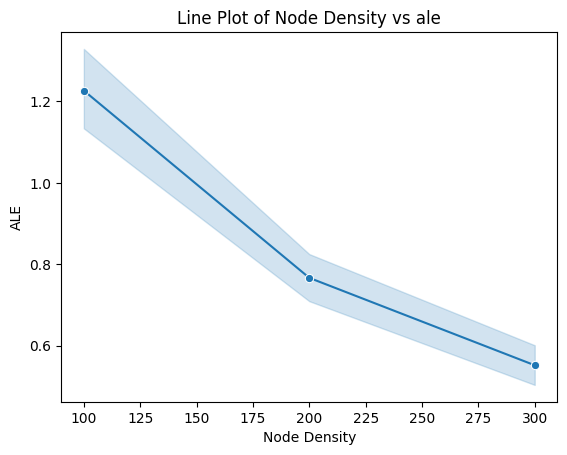

In [23]:
# plt.figure(figsize=(10, 6))
sns.lineplot(x='node_density', y='ale', data=df, marker='o')
plt.title('Line Plot of Node Density vs ale')
plt.xlabel('Node Density')
plt.ylabel('ALE')
plt.show()

### Plotting Iterations vs ALE (Average localization error)

[]

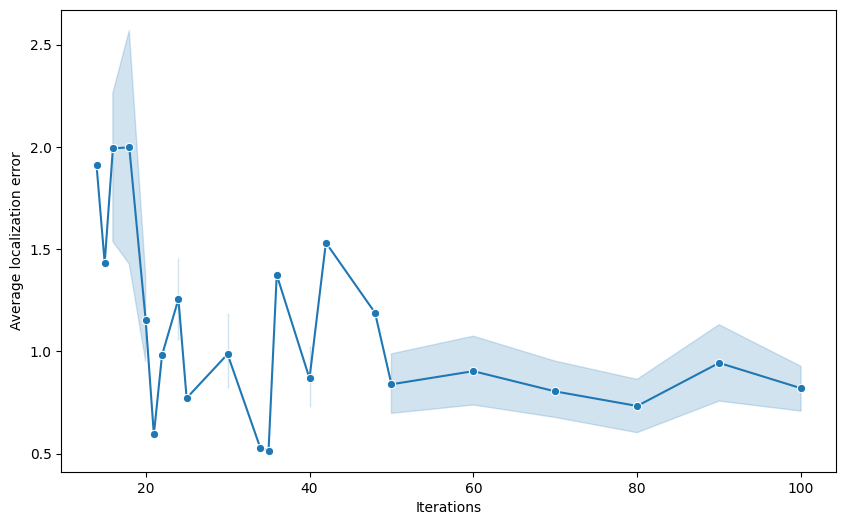

In [78]:
plt.figure(figsize=(10,6))
sns.lineplot(x='iterations',y='ale',data=df,marker='o')
plt.xlabel("Iterations")
plt.ylabel('Average localization error')
plt.plot()


### Plotting Pair Plot on selected columns

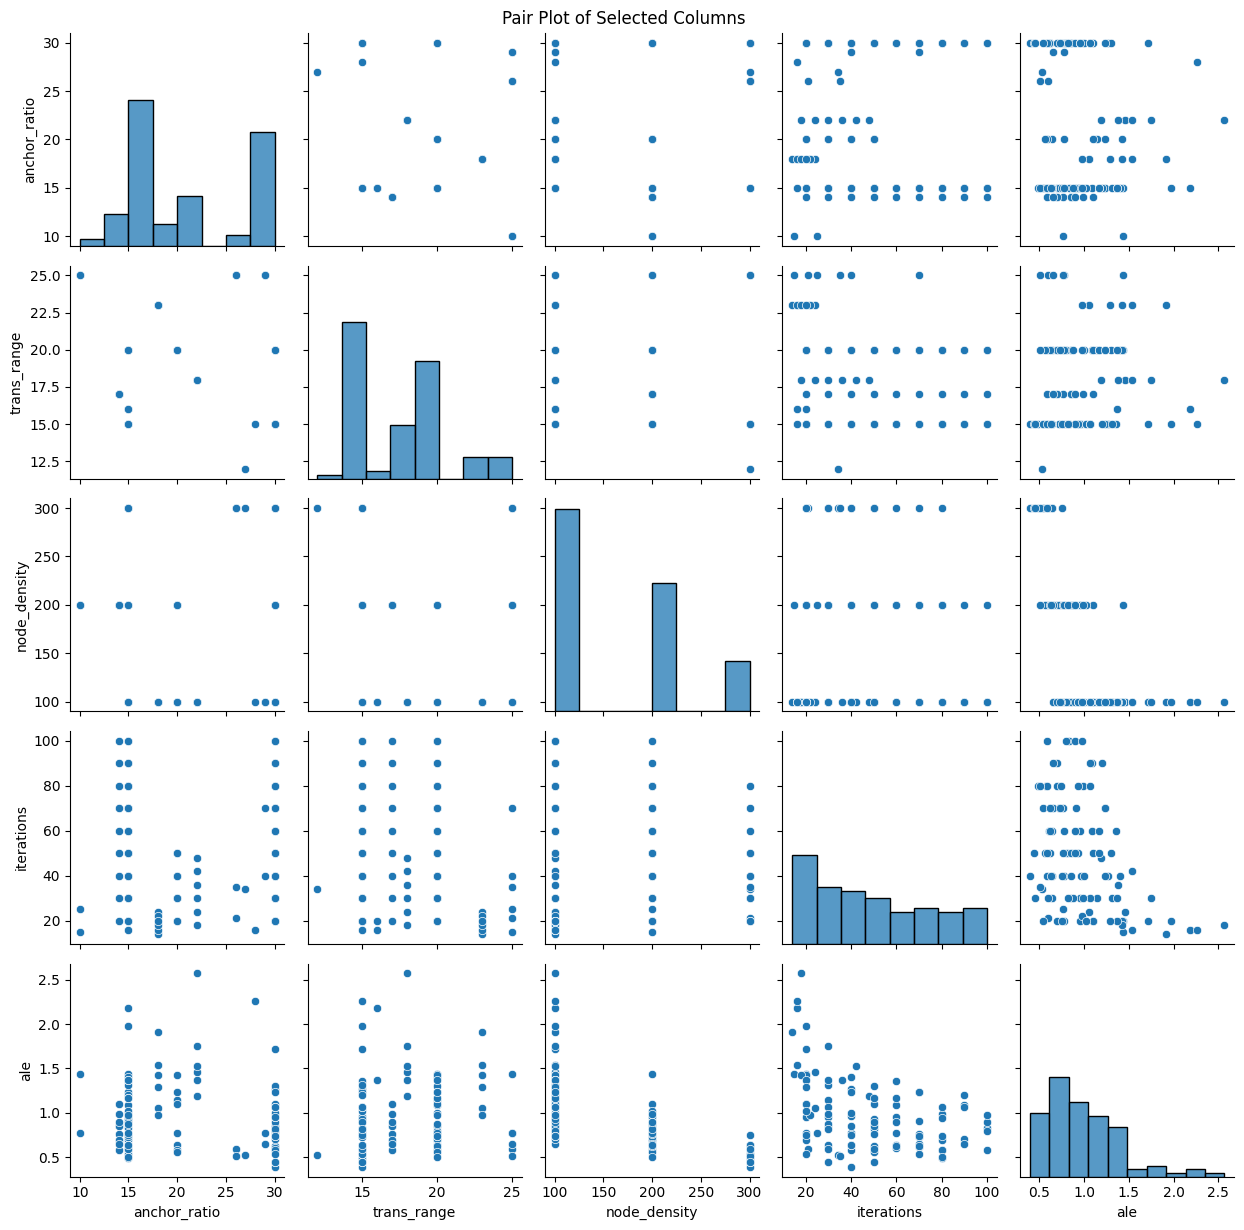

In [32]:
sns.pairplot(df[['anchor_ratio', 'trans_range', 'node_density', 'iterations', 'ale']])
plt.suptitle('Pair Plot of Selected Columns')
plt.tight_layout()
plt.show()

## Data Preprocessing
- Train Test Split
- Checking for outliers
- Checking for missing values
- Removing outliers (If applicable)
- Filling missing values (If applicable)
- Standardization of Dataset

### Checking for an outliers

[]

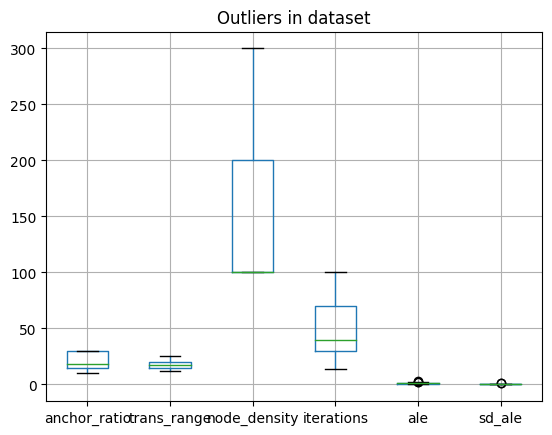

In [49]:
df.boxplot()
plt.title("Outliers in dataset")
plt.plot()

### Checking for missing values

In [50]:
df.isnull().sum()

anchor_ratio    0
trans_range     0
node_density    0
iterations      0
ale             0
sd_ale          0
dtype: int64

### Standardization of Dataset

In [54]:
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)
df_features_scaled = pd.DataFrame(df_features_scaled,columns=df_features.columns)

df_label_scaled = scaler.fit_transform(df_label)
df_label_scaled = pd.DataFrame(df_label_scaled,columns=df_label.columns)

### Train test Split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scaled,df_label_scaled,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(85, 5) (85, 1)
(22, 5) (22, 1)


### `NOTE:` Data Preprocessing has done for (ALE) in sensor node localization process in WSNs check more for ML projects on : www.github.com/itechdp